<a href="https://colab.research.google.com/github/mrdang1407/deeplearning/blob/master/Homework_3_MNIST_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 3
In this exercise, you will try to improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"


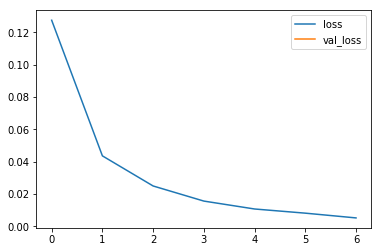


Reached 99.8% accuracy so cancelling training!
10000/10000 [==============================] - 1s 105us/sample - loss: 0.0724 - acc: 0.9822


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from IPython.display import clear_output
# YOUR CODE STARTS HERE

# YOUR CODE ENDS HERE

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print(training_images.shape[0])
print(test_images.shape[0])
# YOUR CODE STARTS HERE
training_images = training_images.reshape(training_images.shape[0],28,28,1)
training_images = training_images / 255.0

test_images = test_images.reshape(test_images.shape[0],28,28,1)
test_images = test_images / 255.0
# YOUR CODE ENDS HERE
class PlotLosses(Callback):    
  def on_train_begin(self, logs={}):  
    self.i = 0  
    self.x = []  
    self.losses = [] 
    self.val_losses = []
    self.fig = plt.figure()
    self.logs = []
  def on_epoch_end(self, epoch, logs={}):
      self.logs.append(logs)
      self.x.append(self.i)
      self.losses.append(logs.get('loss')) 
      self.val_losses.append(logs.get('val_loss'))
      self.i += 1
      clear_output(wait=True)
      plt.plot(self.x, self.losses, label="loss")
      plt.plot(self.x, self.val_losses, label="val_loss")
      plt.legend()
      plt.show();
plot_losses = PlotLosses()
class EarlyStopping(Callback):
  def on_epoch_end(self, epoch, logs={}):
       if(logs.get('acc')>=0.998): 
        print("\nReached 99.8% accuracy so cancelling training!") 
        self.model.stop_training = True

early_stopping = EarlyStopping()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
 
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',               
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
model.fit(training_images,training_labels,epochs=20,callbacks=[plot_losses, early_stopping])
test_loss = model.evaluate(test_images, test_labels)